Question 3: With given input and output relation
x = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
t = [-4.9, -3.5, -2.8, 0.8, 0.3, -1.6, -1.3, 0.5, 2.1, 2.9, 5.6]
Please fit a curve with M=4 Gaussian basis functions having unity variance.

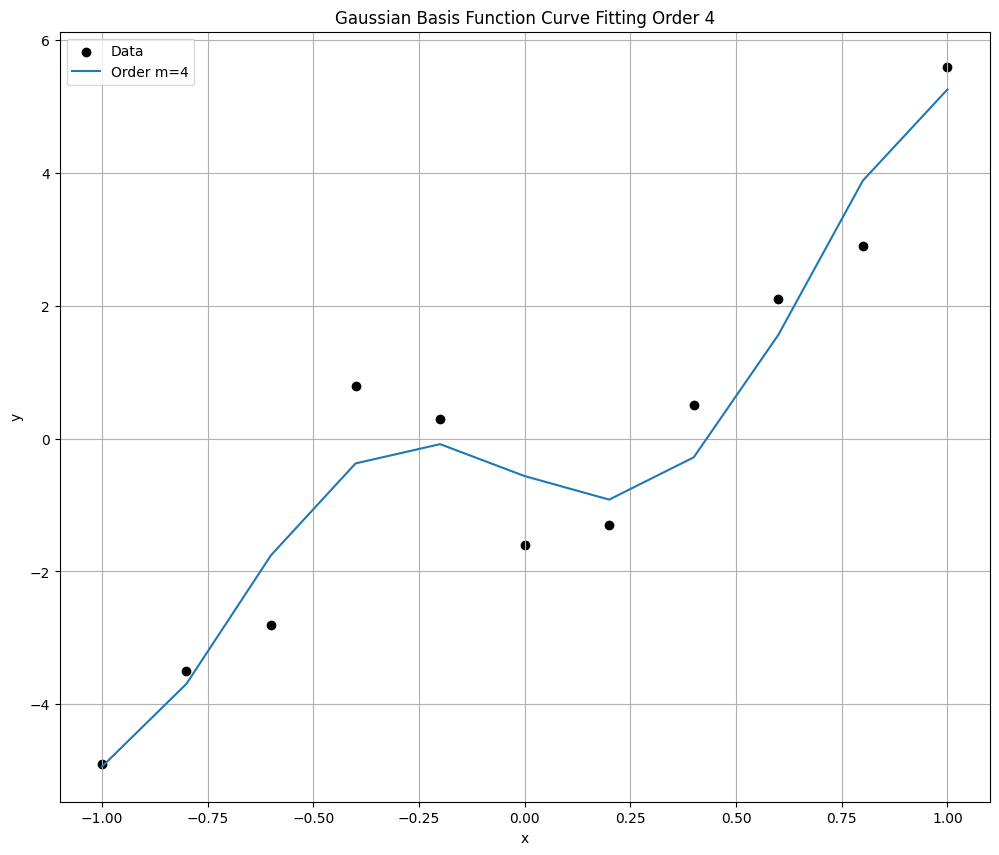

In [8]:

import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
y = np.array([-4.9, -3.5, -2.8, 0.8, 0.3, -1.6, -1.3, 0.5, 2.1, 2.9, 5.6])

variance = 1

def gaussian_basis_function_fit(x, y, m):
    ones_array = np.ones(len(x))
    mus = np.linspace(0, 1, m + 1)
    exp_values = []

    for xi in mus:
        exp_result = np.exp(-(x - xi)**2 / 2 * variance)
        exp_values.append(exp_result)

    exp_matrix = np.vstack(exp_values)

    transposed_exp_matrix = exp_matrix.T

    phi = np.column_stack((ones_array, transposed_exp_matrix))

    w = np.linalg.lstsq(phi, y, rcond=None)[0]
    return phi @ w

plt.figure(figsize=(12, 10))
plt.scatter(x, y, color='black', label="Data")

y_pred = gaussian_basis_function_fit(x, y, 4)
plt.plot(np.sort(x), y_pred[np.argsort(x)], label=f'Order m={4}')

plt.title('Gaussian Basis Function Curve Fitting Order 4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Question 2 : Computes the gradient of the quadratic function of x
given the starting points x=[1,2,3] and then uses the result of the gradient to feed
the next iterations, with new points. Prints out the result of the function at each
iteration till 3rd run. Use Python script to print the results.


### This is a problem of gradient descent :

where according to gradient descent new point is given by 

```
x' = x - eta * f'(x)

```

eta is learning rate and usually lies near to 0


Sample quadratic fn = x^T x
its gradient will be = 2* x

In [16]:
import numpy as np

# quadratic function
def f(x):
    return np.dot(x, x)  # x^T x

# gradient of the function
def grad_f(x):
    return 2 * x

x = np.array([1.0, 2.0, 3.0])

eta = 0.1

for i in range(3):
    func_val = f(x)
    print(f"f(x) = {func_val}")
    gradient = grad_f(x)
    x = x - eta * gradient  # Update x using gradient descent function


f(x) = 14.0
f(x) = 8.96
f(x) = 5.7344
